In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df=pd.read_excel('credit risk test.xlsx')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,N


In [55]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
outcome              0
dtype: int64

In [53]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [54]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [18]:
import seaborn as sns

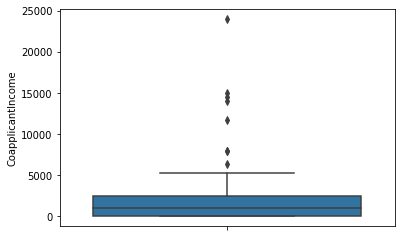

In [30]:
sns.boxplot(y='CoapplicantIncome',data=df)

In [61]:
x=df.iloc[:,1:12].values
y=df.iloc[:,-1].values

In [56]:
x_data=df.drop(['Loan_ID','outcome'],axis=1)
y_data=df['outcome']

In [57]:
x_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [62]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
x[:,0]=labelencoder.fit_transform(x[:,0])

In [64]:
labelencoder1=LabelEncoder()
x[:,1]=labelencoder1.fit_transform(x[:,1])

In [66]:
labelencoder2=LabelEncoder()
x[:,3]=labelencoder2.fit_transform(x[:,3])

In [67]:
x[:,4]=labelencoder.fit_transform(x[:,4])

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columntransformer=ColumnTransformer([('encoder',OneHotEncoder(categories='auto'),[10])],remainder='passthrough')
x=columntransformer.fit_transform(x)

In [76]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,1,1,1,0,0,0,5720,0,110,360,1
1,0,1,1,1,1,0,0,3076,1500,126,360,1
2,0,1,1,1,2,0,0,5000,1800,208,360,1
3,0,1,1,1,2,0,0,2340,2546,100,360,1
4,0,1,1,0,0,1,0,3276,0,78,360,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,1,1,3+,1,1,4009,1777,113,360,1
363,0,1,1,1,0,0,0,4158,709,115,360,1
364,1,0,1,0,0,0,0,3250,1993,126,360,1
365,0,0,1,1,0,0,0,5000,2393,158,360,1


In [71]:
x=x[:,1:]

In [79]:
df1.groupby(4).size()

4
0    210
1     58
2     59
3     40
dtype: int64

In [77]:
df1=pd.DataFrame(x)
df1.replace(to_replace='3+',value=3,inplace=True)

In [78]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,1,1,0,0,0,5720,0,110.0,360.0,1.0
1,0.0,1.0,1,1,1,0,0,3076,1500,126.0,360.0,1.0
2,0.0,1.0,1,1,2,0,0,5000,1800,208.0,360.0,1.0
3,0.0,1.0,1,1,2,0,0,2340,2546,100.0,360.0,1.0
4,0.0,1.0,1,0,0,1,0,3276,0,78.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.0,1.0,1,1,3,1,1,4009,1777,113.0,360.0,1.0
363,0.0,1.0,1,1,0,0,0,4158,709,115.0,360.0,1.0
364,1.0,0.0,1,0,0,0,0,3250,1993,126.0,360.0,1.0
365,0.0,0.0,1,1,0,0,0,5000,2393,158.0,360.0,1.0


In [84]:
df2=pd.DataFrame(y)
df2.head()

,0
0,Y
1,Y
2,Y
3,Y
4,N


In [85]:
df2.replace({
    'Y':1,
    'N':0
},inplace=True)

In [86]:
df2

,0
0,1
1,1
2,1
3,1
4,0
...,...
362,1
363,1
364,1
365,0


In [89]:
y=df2.iloc[:,-1].values

In [90]:
y

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('classification1.xlsx.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [3]:
df['y'].replace({
    'no':0,
    'yes':1
},inplace=True)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [26]:
df.groupby('education').size()

education
blue-collar     1857
primary         6851
secondary      23202
tertiary       13301
dtype: int64

In [56]:
df['job'].replace(to_replace='unknown',value=df['job'].mode()[0],inplace=True)
df['marital'].replace(to_replace='unknown',value=df['job'].mode()[0],inplace=True)
df['education'].replace(to_replace='unknown',value=df['job'].mode()[0],inplace=True)
df['contact'].replace(to_replace='unknown',value=df['job'].mode()[0],inplace=True)
#df.drop('poutcome',axis=1,inplace=True)

In [57]:
x=df.iloc[:,0:15].values
y=df.iloc[:,15].values

In [58]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columntransformer=ColumnTransformer([('encoding',OneHotEncoder(categories='auto'),[11])],remainder='passthrough')
x=columntransformer.fit_transform(x)

In [82]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,1,0,0,0,0,0,0,...,1,0,58,2143,5,may,261,1,-1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,44,29,5,may,151,1,-1,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,33,2,5,may,76,1,-1,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,47,1506,5,may,92,1,-1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,33,1,5,may,198,1,-1,0


In [81]:
x=x[:,1:]

In [83]:
df1=pd.DataFrame(x)

In [30]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,1,0,0,0,0,0,0,...,1,0,58,2143,5,may,261,1,-1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,44,29,5,may,151,1,-1,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,33,2,5,may,76,1,-1,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,47,1506,5,may,92,1,-1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,33,1,5,may,198,1,-1,0


In [84]:
df1.drop(23,axis=1,inplace=True)

In [85]:
x=df1.iloc[:,:].values

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [87]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.519481,0.092259,0.133333,0.053070,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.337662,0.073067,0.133333,0.030704,0.000000,0.000000,0.000000
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.194805,0.072822,0.133333,0.015453,0.000000,0.000000,0.000000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.376623,0.086476,0.133333,0.018707,0.000000,0.000000,0.000000
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.194805,0.072812,0.133333,0.040260,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.428571,0.080293,0.533333,0.198658,0.032258,0.000000,0.000000
45207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.688312,0.088501,0.533333,0.092721,0.016129,0.000000,0.000000
45208,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.701299,0.124689,0.533333,0.229158,0.064516,0.212156,0.010909
45209,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.506494,0.078868,0.533333,0.103294,0.048387,0.000000,0.000000


In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [89]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.519481,0.092259,0.133333,0.053070,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.337662,0.073067,0.133333,0.030704,0.000000,0.000000,0.000000
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.194805,0.072822,0.133333,0.015453,0.000000,0.000000,0.000000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.376623,0.086476,0.133333,0.018707,0.000000,0.000000,0.000000
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.194805,0.072812,0.133333,0.040260,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.428571,0.080293,0.533333,0.198658,0.032258,0.000000,0.000000
45207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.688312,0.088501,0.533333,0.092721,0.016129,0.000000,0.000000
45208,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.701299,0.124689,0.533333,0.229158,0.064516,0.212156,0.010909
45209,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.506494,0.078868,0.533333,0.103294,0.048387,0.000000,0.000000


In [90]:
from sklearn.linear_model import LogisticRegression
regressor_log=LogisticRegression()
regressor_log.fit(x_train,y_train)

C:\Users\Arindam\Anaconda3\envs\py3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
y_pred_log=regressor_log.predict(x_test)

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_log)

0.890913916659294

In [110]:
val_loss, val_acc = regressor_log.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

AttributeError: 'LogisticRegression' object has no attribute 'evaluate'

In [89]:
from sklearn.naive_bayes import GaussianNB
regressor_naive=GaussianNB()
regressor_naive.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [90]:
y_pred_naive=regressor_naive.predict(x_test)

In [91]:
accuracy_score(y_test,y_pred_naive)

0.8017340529063081

In [39]:
import keras

Using TensorFlow backend.


In [40]:
from keras.models import Sequential
from keras.layers import Dense

In [41]:
classifier=Sequential()

In [44]:
classifier.add(Dense(units=14,kernel_initializer='uniform',activation='relu',input_dim=27))

In [95]:
classifier.add(Dense(units=14,kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [96]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [98]:
classifier.fit(x_train,y_train,batch_size=20,epochs=30)

Epoch 1/30
33908/33908 [==============================] - 5s 155us/step - loss: 0.2395 - acc: 0.8952
Epoch 2/30
33908/33908 [==============================] - 5s 152us/step - loss: 0.2396 - acc: 0.8955
Epoch 3/30
33908/33908 [==============================] - 5s 159us/step - loss: 0.2394 - acc: 0.8956
Epoch 4/30
33908/33908 [==============================] - 5s 156us/step - loss: 0.2392 - acc: 0.8958
Epoch 5/30
33908/33908 [==============================] - 5s 156us/step - loss: 0.2389 - acc: 0.8956
Epoch 6/30
33908/33908 [==============================] - 5s 148us/step - loss: 0.2384 - acc: 0.8956
Epoch 7/30
33908/33908 [==============================] - 5s 142us/step - loss: 0.2384 - acc: 0.8967
Epoch 8/30
33908/33908 [==============================] - 5s 139us/step - loss: 0.2377 - acc: 0.8962
Epoch 9/30
33908/33908 [==============================] - 5s 155us/step - loss: 0.2378 - acc: 0.8957
Epoch 10/30
33908/33908 [==============================] - 5s 150us/step - loss: 0.2377 - a

In [108]:
model_loss,model_acc=classifier.evaluate(x_test,y_test)

11303/11303 [==============================] - 1s 50us/step


In [109]:
model_acc

0.8937450234503764

In [99]:
import tensorflow as tf

In [100]:
model=tf.keras.Sequential()

In [101]:
model.add(tf.keras.layers.Dense(14,activation=tf.nn.relu))

In [103]:
model.add(tf.keras.layers.Dense(14,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2,activation=tf.nn.sigmoid))

In [104]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [105]:
model.fit(x_train,y_train,batch_size=10,epochs=30)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 33908 samples
Epoch 1/30
33908/33908 [==============================] - 11s 318us/sample - loss: 0.3418 - acc: 0.8808
Epoch 2/30
33908/33908 [==============================] - 10s 282us/sample - loss: 0.2615 - acc: 0.8841
Epoch 3/30
33908/33908 [==============================] - 10s 282us/sample - loss: 0.2526 - acc: 0.8867
Epoch 4/30
33908/33908 [==============================] - 9s 273us/sample - loss: 0.2499 - acc: 0.8910
Epoch 5/30
33908/33908 [==============================] - 9s 272us/sample - loss: 0.2483 - acc: 0.8917
Epoch 6/30
33908/33908 [==============================] - 9s 267us/sample - loss: 0.2469 - acc: 0.8919
Epoch 7/30
33908/33908 [==============================] - 10s 300us/sample - loss: 0.2464 - acc: 0.8925
Epoch 8/30
33908/33908 [==============================] - 9s 279us/sample - loss: 0.2449 - acc: 0.8926
Epoch 9/30
33908/33908 [==============================] - 10s 285us/

In [106]:
loss,acc=model.evaluate(x_test,y_test)

11303/11303 [==============================] - 1s 69us/sample - loss: 0.2534 - acc: 0.8932


In [107]:
print(loss,acc)

0.2534040487834039 0.89321417


In [111]:
df=pd.read_csv('classification1.xlsx.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [112]:
df['y'].replace({
    'yes':1,
    'no':0
},inplace=True)

In [113]:
df.drop('poutcome',axis=1,inplace=True)

In [114]:
df['job'].replace(to_replace='unknown',value=df['job'].mode()[0],inplace=True)
df['marital'].replace(to_replace='unknown',value=df['job'].mode()[0],inplace=True)
df['education'].replace(to_replace='unknown',value=df['job'].mode()[0],inplace=True)
df['contact'].replace(to_replace='unknown',value=df['job'].mode()[0],inplace=True)

In [115]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,blue-collar,5,may,261,1,-1,0,0
1,44,technician,single,secondary,no,29,yes,no,blue-collar,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,blue-collar,5,may,76,1,-1,0,0
3,47,blue-collar,married,blue-collar,no,1506,yes,no,blue-collar,5,may,92,1,-1,0,0
4,33,blue-collar,single,blue-collar,no,1,no,no,blue-collar,5,may,198,1,-1,0,0


In [117]:
df.drop('month',axis=1,inplace=True)

In [118]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [119]:
age=tf.feature_column.numeric_column('age')
balance=tf.feature_column.numeric_column('balance')
day=tf.feature_column.numeric_column('day')
duration=tf.feature_column.numeric_column('duration')
campaign=tf.feature_column.numeric_column('campaign')
pdays=tf.feature_column.numeric_column('pdays')
previous=tf.feature_column.numeric_column('previous')

In [120]:
job=tf.feature_column.categorical_column_with_hash_bucket('job',hash_bucket_size=10)
marital=tf.feature_column.categorical_column_with_hash_bucket('marital',hash_bucket_size=10)
education=tf.feature_column.categorical_column_with_hash_bucket('education',hash_bucket_size=10)
default=tf.feature_column.categorical_column_with_hash_bucket('default',hash_bucket_size=10)
housing=tf.feature_column.categorical_column_with_hash_bucket('housing',hash_bucket_size=10)
loan=tf.feature_column.categorical_column_with_hash_bucket('loan',hash_bucket_size=10)
contact=tf.feature_column.categorical_column_with_hash_bucket('contact',hash_bucket_size=10)

In [121]:
feat_column=[age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact]

In [122]:
x_data=df.drop('y',axis=1)
y_data=df['y']

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.25)

In [124]:
input_func=tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=50,num_epochs=10,shuffle=True)

In [125]:
model=tf.estimator.LinearClassifier(feature_columns=feat_column)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Arindam\\AppData\\Local\\Temp\\tmpq4g1gg7z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E7A0F22408>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [126]:
model.train(input_fn=input_func,steps=500)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Arindam\AppData\Local\Temp\tmpq4g1gg7z\model.ckpt.
INFO:tensorflow:loss = 34.65736, step = 1
INFO:tensorflow:global_step/sec: 54.8456
INFO:tensorflow:loss = 663.02966, step = 101 (1.823

In [128]:
pred_fn=tf.estimator.inputs.pandas_input_fn(x=x_test,batch_size=len(x_test),shuffle=False)

In [129]:
prediction=list(model.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Arindam\AppData\Local\Temp\tmpq4g1gg7z\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [131]:
final_preds = []
for pred in prediction:
    final_preds.append(pred['class_ids'][0])

In [132]:
accuracy_score(y_test,final_preds)

0.8822436521277537

In [ ]:
from sklearn